# Complex Landscape

In [1]:
# Fix PROJ path ---------------------------------------------------------------
import os; 
os.environ['PROJ_LIB']=r'/opt/conda/pkgs/proj-9.2.1-ha5fc9e9_0/share/proj'
# Load libraries --------------------------------------------------------------
import pandas as pd
import MGSurvE as srv
import matplotlib.pyplot as plt
# Setup data path and ID ------------------------------------------------------
(ID, OUT_PTH) = ('complexLanscape', './out/')
srv.makeFolder(OUT_PTH)

In [2]:
pts = [
    [-4.0, 4.00, 0], 
    [0.25, 8.00, 1], 
    [5.00, 0.15, 0],
    [-1.0, 1.00, 0],
    [3.00, 3.00, 1]
]
points = pd.DataFrame(pts, columns=['x', 'y', 't'])
msk = [
    [0.05, 0.95],
    [0.95, 0.05]
]

In [3]:
trp = [
    [5.00, 2.00, 1, 0],
    [-2.0, 2.00, 0, 0],
    [10.0, 0.00, 0, 1],
]
traps = pd.DataFrame(trp, columns=['x', 'y', 't', 'f'])
tker = {
    0: {'kernel': srv.exponentialDecay, 'params': {'A': 0.4, 'b': .5}},
    1: {'kernel': srv.sigmoidDecay,     'params': {'A': .6, 'rate': 1, 'x0': 0}}
}

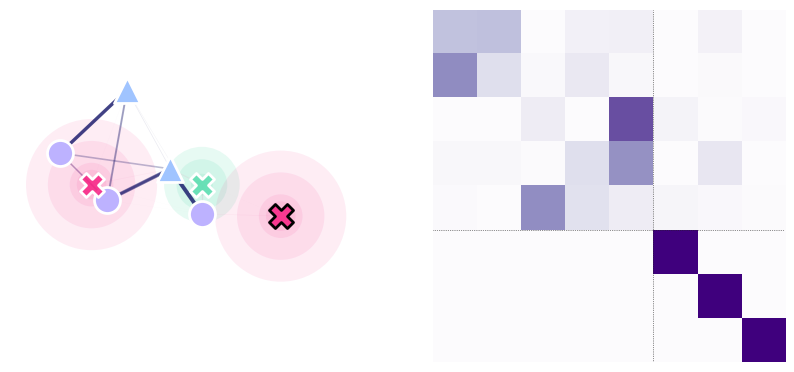

In [4]:
# Land creation ---------------------------------------------------------------
lnd = srv.Landscape(
    points, maskingMatrix=msk, 
    traps=traps, trapsKernels=tker
)
# Plots -----------------------------------------------------------------------
(fig, ax) = plt.subplots(1, 2, figsize=(10, 10), sharey=False)
lnd.plotSites(fig, ax[0])
lnd.plotMaskedMigrationNetwork(fig, ax[0])
lnd.plotTraps(fig, ax[0])
lnd.plotTrapsNetwork(fig, ax[0])
srv.plotMatrix(fig, ax[1], lnd.trapsMigration, lnd.trapsNumber)
[srv.plotClean(fig, i, frame=False) for i in ax]
fig.savefig(
    os.path.join(OUT_PTH, '{}.png'.format(ID)), 
    facecolor='w', bbox_inches='tight', pad_inches=0.1, dpi=150
)

<hr>

# More Information

* [Quickstart](https://chipdelmal.github.io/MGSurvE/build/html/Quickstart.html)
* [Landscape Creation](https://chipdelmal.github.io/MGSurvE/build/html/landscapeCreation.html)
* Doc's Examples: [creation](https://chipdelmal.github.io/MGSurvE/build/html/landscapeCreation.html), [update](https://chipdelmal.github.io/MGSurvE/build/html/landscapeUpdate.html), [complex](https://chipdelmal.github.io/MGSurvE/build/html/landscapeTraps.html)